# Проект: анализ зарплат в России за период с 2000 по 2023 гг.


В проекте исользуются открытые данные из официальных источников:

Сайт Росстата https://rosstat.gov.ru/

Таблицы уровня инфляции в России  https://уровень-инфляции.рф

Необходимо проанализировать динамику уровня средних зарплат в разрезе по видам экономической деятельности за последние 30 лет в России.

## Этапы проекта
__Часть 1__
- Скачайте данные о "Среднемесячной номинальной начисленной заработной плате работников организаций по видам экономической деятельности в Российской Федерации за 2000-2023 гг." по ссылке
- Скачайте данные об уровне инфляции в стране по ссылке
- Выберите 2-3 вида экономической деятельности, наиболее интересные Вам.
- Постройте графики изменения зарплаты по годам для этих видов экономической деятельности. Сделайте выводы
- Пересчитайте средние зарплаты с учетом уровня инфляции и сравните, как влияет инфляция на изменение зарплаты по сравнению с предыдущим годом
- Выберите подходящие визуализации и отобразите динамику изменения реальных зарплат с учетом инфляции. Сделайте выводы

В процессе изучения запросов были получены таблицы:

`Salary_2000_2016.xlsx` --- результат первого запроса. В нём содержится информация о среднемесячных номинальных начисленных заработных платах работников организаций по видам экон.деятельности в РФ за 2000-2016 гг.

`Salary_2017_2023.xlsx` --- результат первого запроса. В нём содержится информация о о среднемесячных номинальных начисленных заработных платах работников организаций по видам экон.деятельности в РФ за 2017-2023 гг.

`Tab_Inf_Year_1991-2024.xlsx` --- результат второго запроса. В нем содержатся данные об уровне инфляции в РФ за 1991-2024 гг.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Чтение исходных данных

In [2]:
list_dict = {'Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2000-2016 гг."':'Salary_2000_2016.xlsx',
             'Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2017-2023 гг."':'Salary_2017_2023.xlsx',
             'Табл. "Данные об уровне инфляции в РФ за 1991-2024 гг."': 'Tab_Inf_Year_1991-2024.xlsx'
            }
df_list=[]
for i in list_dict.values():
    df_list.append(pd.read_excel(i))
    print('Прочитан файл {}'.format(i))

Прочитан файл Salary_2000_2016.xlsx
Прочитан файл Salary_2017_2023.xlsx
Прочитан файл Tab_Inf_Year_1991-2024.xlsx


## Информация о структуре, признаках и описательных статистиках таблиц
Для получения данной информации воспользуемся циклом и объединим в нем несколько характеристик, включая информацию о признаках, описательные статистики и наличие полных дубликатов:

In [3]:
for i in range(len(list_dict)):
    print('\033[1m' + 'Первые 5 строк из {}'.format(list(list_dict.keys())[i])+'\033[0m')
    display(df_list[i].head())
    print('\033[1m' + 'Информация о признаках по {}'.format(list(list_dict.keys())[i])+'\033[0m')
    display(df_list[i].info())
    print('\033[1m' + 'Описательные статистики по {}'.format(list(list_dict.keys())[i])+'\033[0m')
    display(df_list[i].describe())
    print('\033[1m' + 'Количество полных дубликатов в {} равно --- {}.'.\
          format(list(list_dict.keys())[i],df_list[i].duplicated().sum() )+'\033[0m')
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m')

Первые 5 строк из Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2000-2016 гг."


,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
1,"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
2,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
3,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
4,из нее:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о признаках по Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2000-2016 гг."
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Economics_section  35 non-null     object 
 1   2000               33 non-null     float64
 2   2001               33 non-null     float64
 3   2002               33 non-null     float64
 4   2003               33 non-null     float64
 5   2004               33 non-null     float64
 6   2005               33 non-null     float64
 7   2006               33 non-null     float64
 8   2007               33 non-null     float64
 9   2008               33 non-null     float64
 10  2009               33 non-null     float64
 11  2010               33 non-null     float64
 12  2011               33 non-null     float64
 13  2012      

None

Описательные статистики по Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2000-2016 гг."


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2683.118182,3922.760606,5155.387879,6435.569697,7774.478788,9744.066667,11801.436364,14839.909091,18458.451515,19552.363636,22072.424242,24855.845455,27961.151515,30802.415152,33623.424242,35942.909091,39151.151515
std,1392.689200,2186.750198,2814.040859,3430.748271,3997.051987,4935.422425,5748.328789,6973.719178,8102.058375,8532.899463,9721.017260,11044.014526,12437.401363,13229.109753,14788.518612,15762.678063,17627.429737
min,985.100000,1434.600000,1876.400000,2339.800000,3015.400000,3646.200000,4568.700000,6143.800000,8453.600000,9020.500000,10302.100000,11004.400000,12095.400000,13488.500000,14453.000000,15758.000000,17065.000000
25%,1739.100000,2403.600000,3183.100000,3974.200000,4906.200000,6386.800000,8234.900000,10392.200000,13464.000000,14819.500000,15766.400000,17713.300000,20640.700000,23326.900000,25601.000000,26928.000000,28779.000000
50%,2365.200000,3446.600000,4439.100000,5498.500000,6848.900000,8554.900000,10633.900000,13593.400000,17290.100000,17367.800000,20177.800000,23375.300000,26311.600000,28504.900000,30268.000000,32246.000000,35310.000000
75%,2879.200000,4304.200000,5661.500000,7235.300000,8641.800000,10637.300000,12827.500000,16042.600000,19918.100000,22400.500000,24275.000000,26995.000000,29437.100000,32513.500000,37011.000000,39342.000000,43318.000000
max,6985.100000,10905.400000,13245.900000,16135.500000,19903.300000,23455.900000,27885.500000,34879.800000,41871.800000,42372.900000,50120.000000,55788.900000,59195.000000,64760.100000,75517.000000,81605.000000,88194.000000


Количество полных дубликатов в Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2000-2016 гг." равно --- 0.
---------------------------------------------------------------------------------
Первые 5 строк из Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2017-2023 гг."


,Economics_section,20171),2018,2019,2020,2021,20222),"20232), 3)"
0,Всего,39167.0,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
1,"сельское, лесное хозяйство, охота, рыболовст...",25671.1,28699.0,31727.6,34770.0,39436.8,46777.0,52868.3
2,в том числе:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"растениеводство и животноводство, охота и ...",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
4,лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3


Информация о признаках по Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2017-2023 гг."
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Economics_section  53 non-null     object 
 1   20171)             50 non-null     float64
 2   2018               50 non-null     float64
 3   2019               50 non-null     float64
 4   2020               50 non-null     float64
 5   2021               50 non-null     float64
 6   20222)             50 non-null     float64
 7   20232), 3)         50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.4+ KB


None

Описательные статистики по Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2017-2023 гг."


,20171),2018,2019,2020,2021,20222),"20232), 3)"
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,43039.824000,47349.480000,51184.304000,54489.700000,60437.712000,69373.306000,78837.266000
std,20128.216662,22132.209689,23626.815205,25311.236241,26478.144487,30426.066623,33364.630956
min,20193.000000,19819.000000,21065.400000,20927.000000,24311.700000,27351.700000,34049.200000
25%,29992.100000,33129.250000,35469.875000,37684.750000,43297.950000,48483.000000,54861.225000
50%,38033.550000,40857.000000,43991.550000,47024.000000,52822.700000,59766.650000,70824.800000
75%,48854.400000,51114.500000,54244.175000,57236.250000,64385.875000,75198.800000,90297.100000
max,104078.300000,127771.000000,135363.700000,142175.000000,149585.100000,165623.800000,180514.700000


Количество полных дубликатов в Табл. "Среднемесячные номинальные начисленные заработные платы работников организаций по видам экон.деятельности в РФ за 2017-2023 гг." равно --- 0.
---------------------------------------------------------------------------------
Первые 5 строк из Табл. "Данные об уровне инфляции в РФ за 1991-2024 гг."


,Год,Всего
0,2024,7.67
1,2023,7.42
2,2022,11.92
3,2021,8.39
4,2020,4.91


Информация о признаках по Табл. "Данные об уровне инфляции в РФ за 1991-2024 гг."
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Год     34 non-null     int64  
 1   Всего   34 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


None

Описательные статистики по Табл. "Данные об уровне инфляции в РФ за 1991-2024 гг."


,Год,Всего
count,34.000000,34.000000
mean,2007.500000,124.954412
std,9.958246,446.192151
min,1991.000000,2.520000
25%,1999.250000,7.482500
50%,2007.500000,11.550000
75%,2015.750000,19.795000
max,2024.000000,2508.850000


Количество полных дубликатов в Табл. "Данные об уровне инфляции в РФ за 1991-2024 гг." равно --- 0.
---------------------------------------------------------------------------------


Для удобства дальнейшей работы переименуем таблицы с учетом представленных данных и выполним округление до одного знака после запятой в первых двух таблицах, и двум знаком в таблице df_inf_1991_2024:

In [4]:
df_salary_2000_2016 = df_list[0].round(decimals=1)
df_salary_2017_2023 = df_list[1].round(decimals=1)
df_inf_1991_2024 = df_list[2].round(decimals=2)

Посмотрим на полученные датафреймы:

In [5]:
df_salary_2000_2016.head()

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
1,"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
2,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
3,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
4,из нее:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_salary_2017_2023.head()

,Economics_section,20171),2018,2019,2020,2021,20222),"20232), 3)"
0,Всего,39167.0,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
1,"сельское, лесное хозяйство, охота, рыболовст...",25671.1,28699.0,31727.6,34770.0,39436.8,46777.0,52868.3
2,в том числе:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"растениеводство и животноводство, охота и ...",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
4,лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3


In [7]:
df_inf_1991_2024.head()

,Год,Всего
0,2024,7.67
1,2023,7.42
2,2022,11.92
3,2021,8.39
4,2020,4.91


### Вывод по первичному анализу:

Предоставленные данные:
- содержат пропуски, которые требуют обработки;
- типы данных не требуют изменений;
- в таблице `df_salary_2000_2016` в признаке __Economics_section__ все данные приведем к нижнему регистру для удобства дальнейшей работы, т.к. в таблице `df_salary_2017_2023` они уже в нижнем регистре;
- признаки __20171)__,   __20222)__,    __20232), 3)__ в таблице `df_salary_2017_2023` требуют переименования;
- признак __Всего__ в таблице `df_inf_1991_2024` требует переименования;
- не содержат дубликатов;
- привели все количественные признаки в таблицах `df_salary_2000_2016` и `df_salary_2017_2023` к 1-й цифре после запятой, а  в таблице `df_inf_1991_2024` к виду с 2-мя цифрами после запятой.


## Предобработка данных

### Удаление строк с данными NaN

Было замечено, что в таблицах `df_salary_2000_2016` и `df_salary_2017_2023` имеются строки, полность состоящие из NaN. Это объясняется тем, что в исходных статистических таблицах были пустых строки, их необходимо удалить.

### Удаление пустых строк в таблице `df_salary_2000_2016`

Посмотрим на эти строки и выведем их номера:

In [8]:
df_salary_2000_2016[df_salary_2000_2016.isnull().any(axis=1)]

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4,из нее:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,из них:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_salary_2000_2016[df_salary_2000_2016.isnull().any(axis=1)].index

Index([4, 8], dtype='int64')

Удалим такие строки:

In [10]:
df_salary_2000_2016 = df_salary_2000_2016. drop(df_salary_2000_2016[df_salary_2000_2016.isnull().any(axis=1)].index)

Проверим, что в этой таблице таких строк не осталось:

In [11]:
df_salary_2000_2016[df_salary_2000_2016.isnull().any(axis=1)]

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016


Отлично, успешно удалили!

### Удаление пустых строк в таблице `df_salary_2017_2023`

Выведем  номера пустых строк:

In [12]:
df_salary_2017_2023[df_salary_2017_2023.isnull().any(axis=1)].index

Index([2, 7, 12], dtype='int64')

Всего три пустых строки. Удалим их.

In [13]:
df_salary_2017_2023 = df_salary_2017_2023.drop(df_salary_2017_2023[df_salary_2017_2023.isnull().any(axis=1)].index)

Проверим, что в этой таблице таких строк не осталось:

In [14]:
df_salary_2017_2023[df_salary_2017_2023.isnull().any(axis=1)]

,Economics_section,20171),2018,2019,2020,2021,20222),"20232), 3)"


Удаление пустых строк прошло успешно.

### Переименование признаков

Переименовываем признаки  

20171)

20222)

20232), 3)

в таблице `df_salary_2017_2023`

In [15]:
df_salary_2017_2023 = df_salary_2017_2023.rename(columns={'20171)': '2017', '20222)': '2022', '20232), 3)': '2023'})

Проверим, что все прошло нормально:

In [16]:
df_salary_2017_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Economics_section  50 non-null     object 
 1   2017               50 non-null     float64
 2   2018               50 non-null     float64
 3   2019               50 non-null     float64
 4   2020               50 non-null     float64
 5   2021               50 non-null     float64
 6   2022               50 non-null     float64
 7   2023               50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.5+ KB


Переименовываем признак __Всего__ в таблице `df_inf_1991_2024`

In [17]:
df_inf_1991_2024 = df_inf_1991_2024.rename(columns={'Всего': 'annual_inf'})

In [18]:
df_inf_1991_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Год         34 non-null     int64  
 1   annual_inf  34 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


### Приведение данных к нижнему регистру в признаке Economics_section

В таблице `df_salary_2000_2016` в признаке __Economics_section__ все данные приведем к нижнему регистру для удобства дальнейшей работы, т.к. в таблице `df_salary_2017_2023` они уже в нижнем регистре:

In [19]:
df_salary_2000_2016['Economics_section'] = df_salary_2000_2016['Economics_section'].str.lower()

Проверка на наличие дубликатов после предобработки:

In [20]:
df_salary_2000_2016.duplicated().sum()

0

In [21]:
df_salary_2017_2023.duplicated().sum()

0

In [22]:
df_inf_1991_2024.duplicated().sum()

0

### Вывод по предобработке данных:

Во всех таблицах навели порядок с данными:
- удалены строки с пропусками;
- признаки __20171)__,   __20222)__,    __20232), 3)__ в таблице `df_salary_2017_2023` переименования;
- признак __Всего__ в таблице `df_inf_1991_2024` переименован;
- в таблице `df_salary_2000_2016` в признаке __Economics_section__ все данные приведем к нижнему регистру;
- убедились, что таблицы не содержат дубликатов.

## Подготовка к исследовательскому анализу

Была идея объединить две таблицы с зарплатами за разные периоды, но вначале проверим размерности таблиц о количеству записей:

In [23]:
df_salary_2000_2016.shape[0]

33

In [24]:
df_salary_2017_2023.shape[0]

50

Так как таблицы по количеству записей различны, да и не совсем понятно, есть ли строгое соответствие по признаку __Economics_section__, было принято решение выбрать из таблиц только записи с интересующими разделами экономики

Посмотрим на уникальные значения каждой из таблиц за разные периоды:

In [25]:
df_salary_2000_2016.Economics_section.unique()

array(['всего по  экономике',
       'сельское хозяйство, охота и лесное хозяйство',
       'рыболовство, рыбоводство', 'добыча полезных ископаемых',
       '\xa0\xa0добыча топливно-энергетических \xa0полезных ископаемых',
       '\xa0\xa0добыча полезных ископаемых, \xa0кроме топливно-энергетических',
       'обрабатывающие производства',
       '\xa0\xa0производство пищевых продуктов, \xa0\xa0включая напитки, и табака',
       '\xa0\xa0текстильное и швейное производство',
       '\xa0\xa0производство кожи, изделий из \xa0\xa0кожи и производство обуви',
       '\xa0\xa0обработка древесины и производство изделий из дерева',
       '\xa0\xa0целлюлозно-бумажное производство; издательская и полиграфическая деятельность',
       '\xa0\xa0производство кокса и нефтепродуктов',
       '\xa0\xa0химическое производство',
       '\xa0\xa0производство резиновых и\xa0\xa0пластмассовых изделий',
       '\xa0\xa0производство прочих неметаллических минеральных продуктов',
       '\xa0\xa0металлургичес

In [26]:
df_salary_2017_2023.Economics_section.unique()

array(['Всего',
       '  сельское, лесное хозяйство, охота, рыболовство и рыбоводство',
       '    растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях ',
       '    лесоводство и лесозаготовки', '    рыболовство и рыбоводство',
       '  добыча полезных ископаемых', '     добыча угля',
       '     добыча нефти и природного газа',
       '     добыча металлических руд', '  обрабатывающие производства',
       '    производство пищевых продуктов', '    производство напитков',
       '    производство табачных изделий',
       '    производство текстильных изделий', '    производство одежды',
       '    производство кожи и изделий из кожи',
       '    обработка древесины и производство изделий из дерева и пробки, кроме мебели, производство изделий из соломки и материалов для плетения',
       '    производство бумаги и бумажных изделий',
       '    деятельность полиграфическая и копирование носителей информации',
       '    производство к

Остановимся на разделах __добыча полезных ископаемых__, __строительство__, __образование__

Вытащим из таблицы `df_salary_2000_2016` нужные записи и сохраним в новом датафрейме:

In [27]:
df_2000_2016 = df_salary_2000_2016.loc[((df_salary_2000_2016['Economics_section'] == 'добыча полезных ископаемых') | \
        (df_salary_2000_2016['Economics_section' ] == 'строительство') | \
        (df_salary_2000_2016['Economics_section' ] == 'образование'))]

In [28]:
df_2000_2016.head()

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
24,строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,21171.7,23682.0,25950.6,27701.4,29354.0,29960.0,32332.0
32,образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,14075.2,15809.1,18995.3,23457.9,25862.0,26928.0,28088.0


Переномеруем строки для дальнейшего объединения новых таблиц:

In [29]:
df_2000_2016.index = [0,1,2]
df_2000_2016

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
1,строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,21171.7,23682.0,25950.6,27701.4,29354.0,29960.0,32332.0
2,образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,14075.2,15809.1,18995.3,23457.9,25862.0,26928.0,28088.0


Вытащим из таблицы `df_salary_2017_2023` нужные записи и сохраним в новом датафрейме:

In [30]:
df_2017_2023 = df_salary_2017_2023.loc[((df_salary_2017_2023['Economics_section'] == '  добыча полезных ископаемых') | \
        (df_salary_2017_2023['Economics_section' ] == 'строительство') | \
        (df_salary_2017_2023['Economics_section' ] == 'образование'))]

In [31]:
df_2017_2023.head()

,Economics_section,2017,2018,2019,2020,2021,2022,2023
6,добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
39,строительство,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
50,образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


Переномеруем строки в новом дата фрейме:

In [32]:
df_2017_2023.index = [0,1,2]
df_2017_2023

,Economics_section,2017,2018,2019,2020,2021,2022,2023
0,добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
1,строительство,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
2,образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


Переименуем признак __Economics_section__ в этой таблице, иначе столкнемся с двумя одинаковыми признаками после объединения таблиц:

In [33]:
df_2017_2023 = df_2017_2023.rename(columns = {'Economics_section':'section'})
df_2017_2023

,section,2017,2018,2019,2020,2021,2022,2023
0,добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
1,строительство,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
2,образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


Объединим эти две таблицы по столбцам:

In [34]:
data = pd.concat([df_2000_2016, df_2017_2023], axis=1)
data

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,section,2017,2018,2019,2020,2021,2022,2023
0,добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,...,63695.0,69936.0,добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
1,строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,...,29960.0,32332.0,строительство,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
2,образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,...,26928.0,28088.0,образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


Удалим признак __section__ в объединенной таблице

In [35]:
del data['section']

Получим новый датафрейм для дальнейшей работы:

In [36]:
data

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,...,58959.0,63695.0,69936.0,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
1,строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
2,образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Economics_section  3 non-null      object 
 1   2000               3 non-null      float64
 2   2001               3 non-null      float64
 3   2002               3 non-null      float64
 4   2003               3 non-null      float64
 5   2004               3 non-null      float64
 6   2005               3 non-null      float64
 7   2006               3 non-null      float64
 8   2007               3 non-null      float64
 9   2008               3 non-null      float64
 10  2009               3 non-null      float64
 11  2010               3 non-null      float64
 12  2011               3 non-null      float64
 13  2012               3 non-null      float64
 14  2013               3 non-null      float64
 15  2014               3 non-null      float64
 16  2015               3 non-null      

In [38]:
data.to_csv('data.csv')

### Вывод по этапу подготовки:

 - Была проведена необходимая работа по исследованию таблиц за периоды 2000-2016 и 2017- 2023 гг. и выбраны конкретные разделы экономики __добыча полезных ископаемых__, __строительство__, __образование__ для дальнейшего анализа;
 - Обе полученные таблицы по выбранных разделам экономики были объединены в одну, в которой отражаются данные за 2000-2023 гг.

## Исследовательский анализ

### Графики изменения зарплаты по годам для видов экономической деятельности __добыча полезных ископаемых__, __строительство__, __образование__

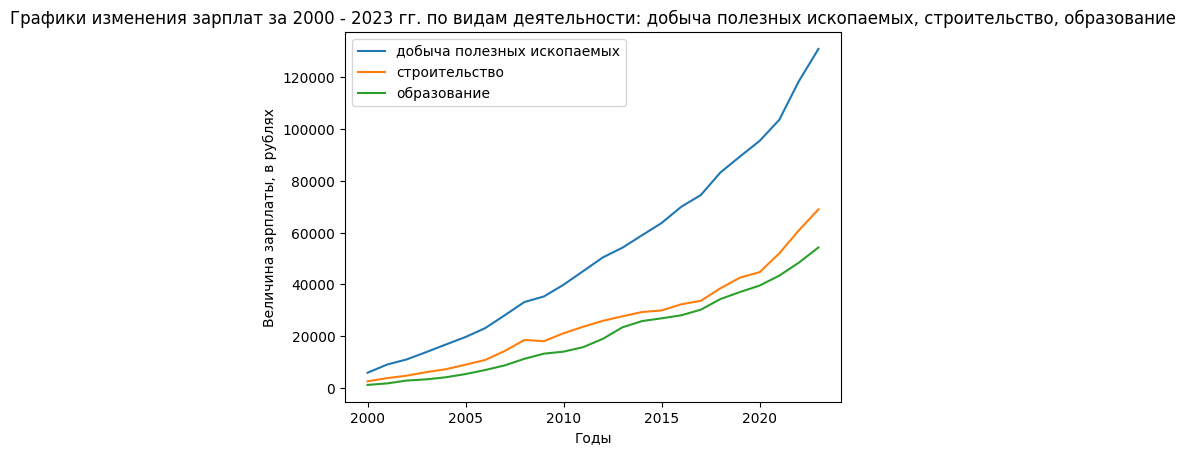

In [39]:
list_ser = ['добыча полезных ископаемых', 'строительство','образование' ]
for i in list_ser:
    austr = data.loc[data['Economics_section'].eq(i)] # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0] # преобразовываем данные из широкого формата в высокий (транспонирование)
    #plt.legend([i])
    d.plot()

plt.legend(['добыча полезных ископаемых', 'строительство','образование' ])
plt.title('Графики изменения зарплат за 2000 - 2023 гг. по видам деятельности: добыча полезных ископаемых, строительство, образование')
plt.ylabel('Величина зарплаты, в рублях')
plt.xlabel('Годы')
plt.show()

### Вывод:

Анализируя график, можно заметить:
- заработная плата в области добычи полезных ископаемых растет существенно быстрее, чем в образовании и строительстве. К 2023 г. она превосходит примерно в 2 раза рост зарплат по двум другим областям;
- рост зарплаты в строительстве незначительно превышает рост зарплат в образовании, но в период с 2005 по 2014  рост заплаты в строительстве превышал рост зарплат в образовании, затем, примерно с 2013 г. их рост примерно выравнялся (что можно объяснить "майскими" указами и повышению зарплат, согласно им, в образовании) , а с 2020 г. наблюдается отрыв в росте зарплат в строительстве от зарплат в образовании.

## Исследование средних зарплат с учетом уровня инфляции

Необходимо пересчитать средние зарплаты с учетом уровня инфляции и выяснить, как влияет инфляция на изменение зарплаты по сравнению с предыдущим годом.

Расчеты реальной заработной платы были выполнены согласно статьи "Реальная и номинальная заработная плата: отличия, формула расчета", автора Марина Ермакова, старший куратор группы по расчету заработной платы 1С-WiseAdvice (г. Волгоград)
https://1c-wiseadvice.ru/company/blog/realnaya-i-nominalnaya-zarabotnaya-plata-otlichiya-formula-rascheta/

Понятие Индекса потребительских цен взято из статьи Михаила Афонина, начальника управления статистики цен и финансов Росстата
 https://rosstat.gov.ru/ps/inflation/#:~:text=%D0%98%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D1%8F%20%E2%80%93%20%D0%BE%D0%B1%D0%B5%D1%81%D1%86%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B4%D0%B5%D0%BD%D0%B5%D0%B3%20%D0%BF%D0%BE%20%D0%BF%D1%80%D0%B8%D1%87%D0%B8%D0%BD%D0%B5,%E2%80%94%2051%2C%20%D1%8D%D1%82%D0%BE%20%D0%BF%D1%80%D0%BE%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8.

 Расчетные формулы:

Расчет индекса номинальной зарплаты делается по формуле:

Ином = НЗтг / НЗпг ×100%, где

Ином — индекс номинальной зарплаты (%);

НЗтг — номинальная сумма заработка за текущий год;

НЗпг — номинальный заработок за предыдущий год.

Индекс реальной зарплаты:

Ир = Ином / Иц (%), где:

Ир — индекс реальной зарплаты;

Ином — индекс номинальной зарплаты;

Иц — индекс цен, где Иц = 100 + Инфл, Инф - показатель инфляции

Тогда реальная зарплата РЗ = НЗпг * Ир

Объединяя все формулы, можно получить формулу расчета реальной зарплаты:

РЗ = НЗпг * (Ином/Иц) = НЗпг * (НЗтг/НЗпг*100)/(100 + Инф)

Формипуем новый датафрейм, в котором будет находиться реальная зарплата за указанных период с 2000 по 2023 гг.

In [40]:
data_RS  = data[['Economics_section', 2000]].copy()
data_RS

,Economics_section,2000
0,добыча полезных ископаемых,5940.2
1,строительство,2639.8
2,образование,1240.2


В процессе работы выяснилось, что не все названия признаков с 2017 по 2023 гг. имеют одинаковы тип данных, приводим к единому со всеми годами типу годы
 2017, 2022 и 2023

In [41]:
data = data.rename(columns={'2017': 2017, '2022': 2022, '2023': 2023})

Воспользуемся таблицей , в которой хранится инфляция с 1991 по 2014 г., предварительно отсортируем по возрастанию

In [42]:
df = df_inf_1991_2024.sort_values(by='Год', ascending=True)

Вырежем из таблицы инфляции интересующие насгоды , с 2000 по 2023, а затем изменим нумерацию строк, чтобы начиналось с 0

In [43]:
df_2000_2023 = df[(df['Год'] >= 2000) & (df['Год'] <= 2023)]

In [44]:
df_2000_2023.iloc[::-1].reset_index(drop=True)

,Год,annual_inf
0,2023,7.42
1,2022,11.92
2,2021,8.39
3,2020,4.91
4,2019,3.05
5,2018,4.27
6,2017,2.52
7,2016,5.38
8,2015,12.91
9,2014,11.36


Заполняем новый датафрейм расчетами реальных зарплат по указанной выше формуле с учетом инфляции с 2000 по 2023 год (вытаскиваем в обратном порядке из датафрейма df_2000_2023)   и выводим новый датафрейм с реальными зарплатами его с учетом округления до двух цифр после запятой

In [45]:
data_list = data.columns
for i in range(len(data_list)-2):
    inf =  df_2000_2023.iloc[::-1].reset_index(drop=True)['annual_inf'][23 - i]
    #print(inf)
    #print(data[2000 + i+1])
    data_RS[2000 + i+1] = (data[2000 + i] * data[2000 +i+1] *100 /(data[2000 + i]*(100 + inf))).round(decimals=2)
    #print('rs', data_RS[2000 + i+1])
data_RS

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,добыча полезных ископаемых,5940.2,7570.05,9344.66,12091.43,15038.57,17654.29,20868.45,25786.70,29682.76,...,55386.57,57197.38,61939.60,70671.95,81133.44,85684.95,92536.63,98630.73,109212.75,116892.07
1,строительство,2639.8,3210.73,4053.72,5368.24,6522.64,8092.72,9800.02,13149.91,16603.20,...,27575.39,26903.74,28635.20,31958.53,37571.21,40884.15,43413.88,49513.11,56139.40,61601.50
2,образование,1240.2,1524.96,2468.63,2943.33,3753.37,4859.23,6296.37,8053.49,10116.03,...,24294.97,24181.03,24876.45,28712.85,33516.39,35553.75,38392.04,41359.74,44653.75,48483.47


In [46]:
data_RS.to_csv('data_RS.csv')

Построим окончательно графики номинальной и реальной зарплат по выбранным разделам экономики __добыча полезных ископаемых__, __строительство__,__образование__ за период с 2000 по 2023 гг.

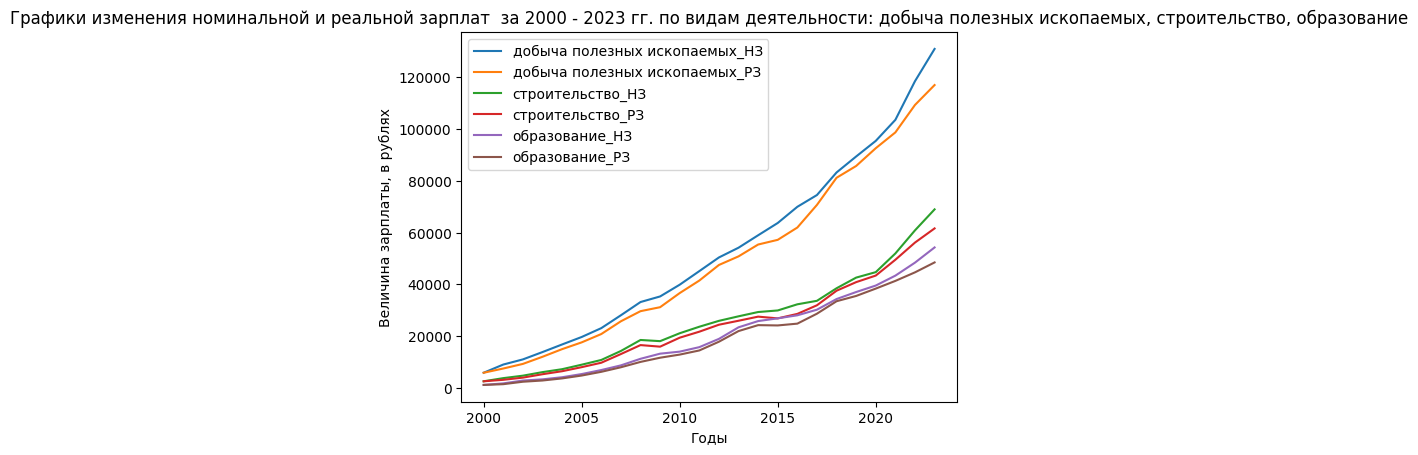

In [47]:
list_ser = ['добыча полезных ископаемых', 'строительство','образование' ]
for i in list_ser:
    austr = data.loc[data['Economics_section'].eq(i)] # выбираем нужную строку данных
    austr_2 = data_RS.loc[data['Economics_section'].eq(i)] # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0] # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    #plt.legend([i])
    d.plot()
    d_2.plot()
plt.legend(['добыча полезных ископаемых_НЗ','добыча полезных ископаемых_РЗ', 'строительство_НЗ','строительство_РЗ','образование_НЗ', 'образование_РЗ'])
plt.title('Графики изменения номинальной и реальной зарплат  за 2000 - 2023 гг. по видам деятельности: добыча полезных ископаемых, строительство, образование')
plt.ylabel('Величина зарплаты, в рублях')
plt.xlabel('Годы')
plt.show()

Посмотрим на эти графики в отдельности по видам экономической деятельности:

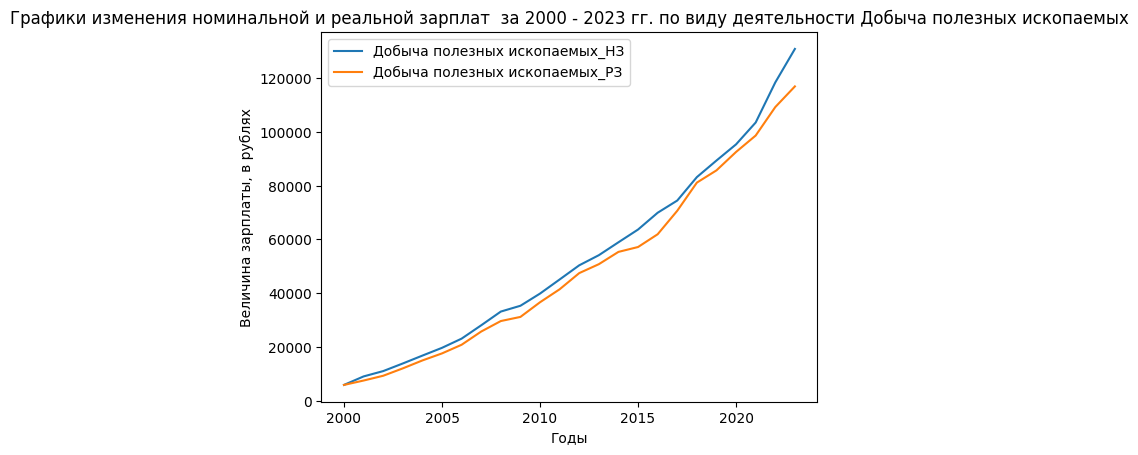

In [48]:
    austr = data.loc[data['Economics_section'].eq('добыча полезных ископаемых')]   # выбираем нужную строку данных
    austr_2 = data_RS.loc[data['Economics_section'].eq('добыча полезных ископаемых')]   # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    plt.legend(['Добыча полезных ископаемых_НЗ', 'Добыча полезных ископаемых_РЗ'])
    plt.title('Графики изменения номинальной и реальной зарплат  за 2000 - 2023 гг. по виду деятельности Добыча полезных ископаемых')
    plt.ylabel('Величина зарплаты, в рублях')
    plt.xlabel('Годы')
    plt.show()

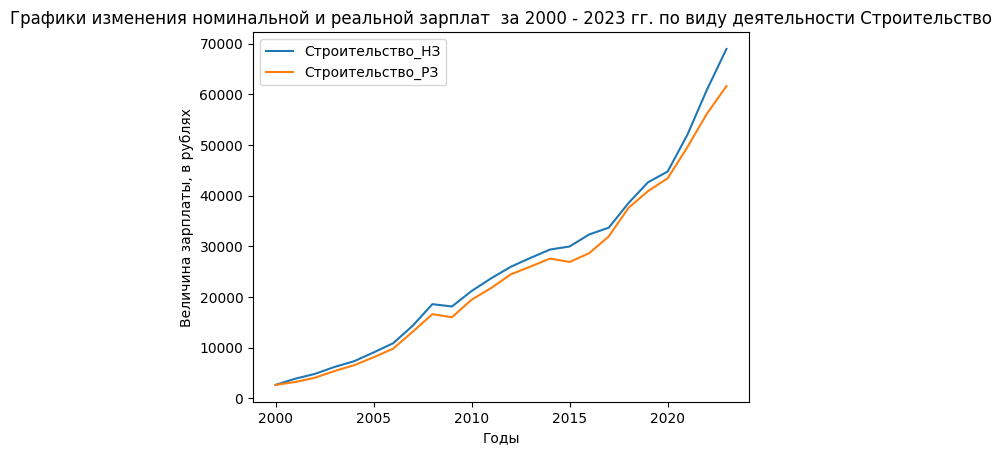

In [49]:
    austr = data.loc[data['Economics_section'].eq('строительство')]   # выбираем нужную строку данных
    austr_2 = data_RS.loc[data['Economics_section'].eq('строительство')]   # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    plt.legend(['Cтроительство_НЗ', 'Cтроительство_РЗ'])
    plt.title('Графики изменения номинальной и реальной зарплат  за 2000 - 2023 гг. по виду деятельности Cтроительство')
    plt.ylabel('Величина зарплаты, в рублях')
    plt.xlabel('Годы')
    plt.show()

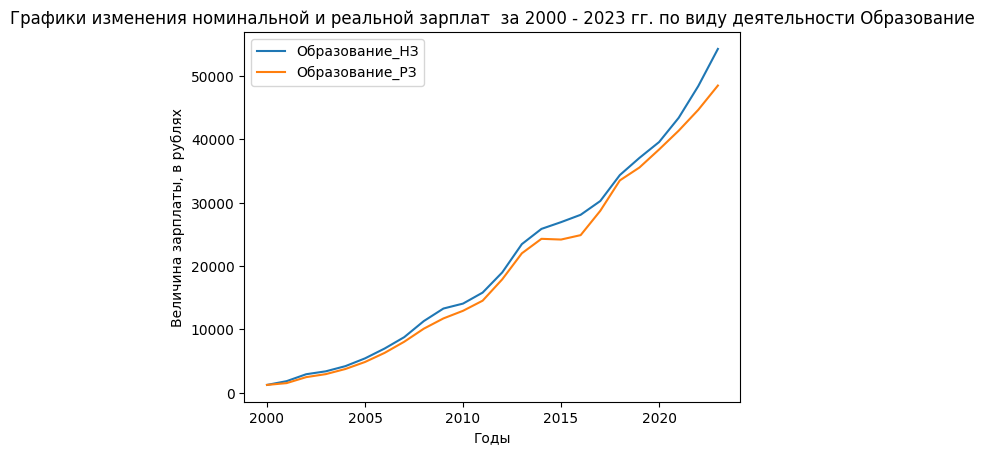

In [50]:
    austr = data.loc[data['Economics_section'].eq('образование')]   # выбираем нужную строку данных
    austr_2 = data_RS.loc[data['Economics_section'].eq('образование')]   # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    plt.legend(['Образование_НЗ', 'Образование_РЗ'])
    plt.title('Графики изменения номинальной и реальной зарплат  за 2000 - 2023 гг. по виду деятельности Образование')
    plt.ylabel('Величина зарплаты, в рублях')
    plt.xlabel('Годы')
    plt.show()

### Вывод:
Анализируя графики изменения номинальных и реальных зарплат в выбранных областях экономики __Добыча полезных ископаемых__, __Строительство__, __Образование__ можно заметить:
- реальные заработные платы отстают от  номинальных зарплат, что говорит о недостаточном уровне номинальных заработных плат, а именно так, чтобы их рост опережал рост инфляции;
- можно выделить периоды, когда реальные зарплаты еще больше отличались от номинальных, а именно, это 2008-2009, 2014-2018г., и начавшийся примерно в 2022 г. новый период несоответствия.


## Выберите подходящие визуализации и отобразите динамику изменения реальных зарплат с учетом инфляции. Сделайте выводы

Для качественной демонстрации динамики изменения реальных зарплат с учетом инфляции, построим график индекса изменения реальной зарплаты и дополним его графиком индекса изменения номанальной зарплаты.  
Расчетные формулы:

Расчет индекса номинальной зарплаты делается по формуле:

Ином = НЗтг / НЗпг ×100%, где

Ином — индекс номинальной зарплаты (%);

НЗтг — номинальная сумма заработка за текущий год;

НЗпг — номинальный заработок за предыдущий год.

Индекс изменения реальной зарплаты:

Ир = Ином / Иц (%), где:

Ир — индекс реальной зарплаты;

Ином — индекс номинальной зарплаты;

Иц — индекс цен, где Иц = 100 + Инфл, Инф - показатель инфляции

Повторим ряд предыдущий действий для формирования двух датафреймов, d которых будет накапливать индекс номинальных зарплат data_Ins и индекс реальных зарплат data_Irs

In [51]:
data_Ins  = data[['Economics_section', 2000]].copy()
data_Irs  = data[['Economics_section', 2000]].copy()

Очевидно, что индексы будут найдены как некоторые коэффициенты, поэтому необходимо промасштабировать базовые значения, а именно данные за 2000 год. Примем их за 100.

In [52]:
data_Ins[2000] = 100
data_Irs[2000] = 100

Формирум таблицу, содержащую индексы изменения номинальных зарплат

In [53]:
data_list = data.columns
for i in range(len(data_list)-2):
    inf =  df_2000_2023.iloc[::-1].reset_index(drop=True)['annual_inf'][23 - i]
    data_Ins[2000 + i+1] = (data[2000 +i+1] *100 /(data[2000 + i])).round(decimals=2)
data_Ins

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,добыча полезных ископаемых,100,153.18,121.78,125.55,121.06,117.13,117.33,121.44,118.14,...,108.86,108.03,109.80,106.49,111.69,107.41,106.73,108.51,114.40,110.52
1,строительство,100,146.20,124.55,128.50,118.26,123.79,120.20,131.87,129.59,...,105.97,102.06,107.92,104.16,114.37,110.68,104.95,116.11,117.14,113.30
2,образование,100,147.80,159.70,115.69,124.12,129.17,128.61,125.70,128.92,...,110.25,104.12,104.31,107.72,113.56,107.89,106.72,109.67,111.55,112.11


In [54]:
data_Ins.to_csv('data_Ins.csv')

Формирум таблицу, содержащую индексы изменения реальных зарплат

In [55]:
data_list = data.columns
for i in range(len(data_list)-2):
    inf =  df_2000_2023.iloc[::-1].reset_index(drop=True)['annual_inf'][23 - i]
    data_Irs[2000 + i+1] = (data[2000 +i+1] *100 /(data[2000 + i] * (100 + inf))*100).round(decimals=2)
data_Irs

,Economics_section,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,добыча полезных ископаемых,100,127.44,102.70,109.12,108.09,104.82,105.79,111.41,105.60,...,102.26,97.01,97.24,101.05,108.94,103.01,103.57,103.43,105.55,98.75
1,строительство,100,121.63,105.04,111.68,105.60,110.79,108.37,120.98,115.84,...,99.55,91.65,95.58,98.84,111.56,106.14,101.84,110.67,108.08,101.24
2,образование,100,122.96,134.68,100.55,110.83,115.60,115.96,115.32,115.24,...,103.57,93.50,92.38,102.22,110.77,103.47,103.56,104.54,102.91,100.17


In [56]:
data_Irs.to_csv('data_Irs.csv')

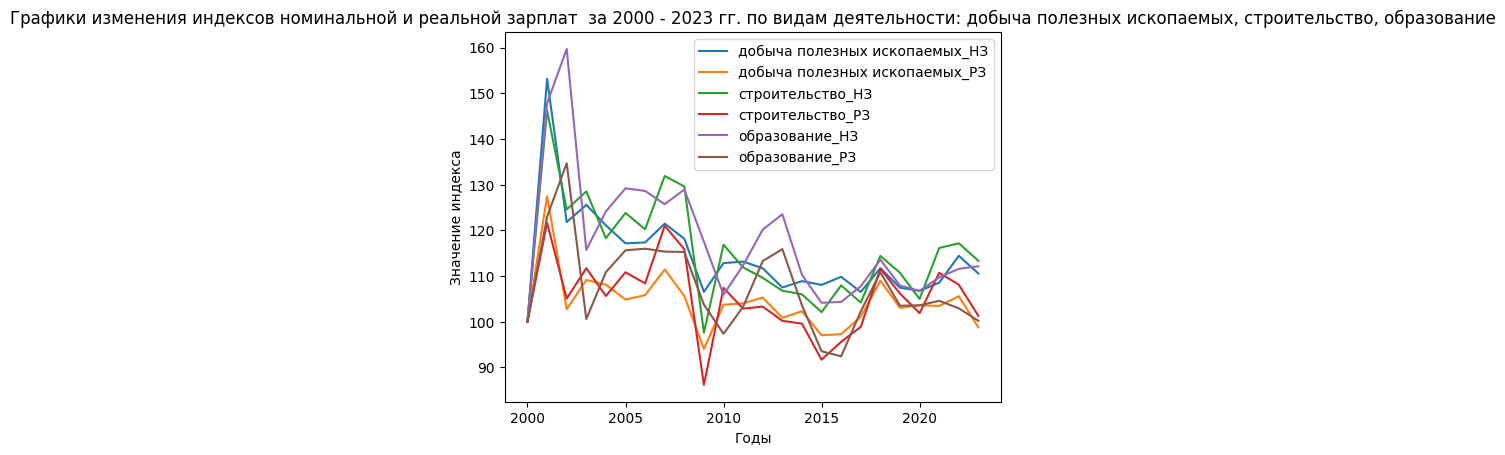

In [57]:
list_ser = ['добыча полезных ископаемых', 'строительство','образование' ]
for i in list_ser:
    austr = data_Ins.loc[data['Economics_section'].eq(i)] # выбираем нужную строку данных
    austr_2 = data_Irs.loc[data['Economics_section'].eq(i)] # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0] # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    #plt.legend([i])
    d.plot()
    d_2.plot()
plt.legend(['добыча полезных ископаемых_НЗ','добыча полезных ископаемых_РЗ', 'строительство_НЗ','строительство_РЗ','образование_НЗ', 'образование_РЗ'])
plt.title('Графики изменения индексов номинальной и реальной зарплат  за 2000 - 2023 гг. по видам деятельности: добыча полезных ископаемых, строительство, образование')
plt.ylabel('Значение индекса')
plt.xlabel('Годы')
plt.show()

Эти графики, конечно, красивые, но плохо читаемые, поэтому  построим графики для каждой отдельной области экономики:

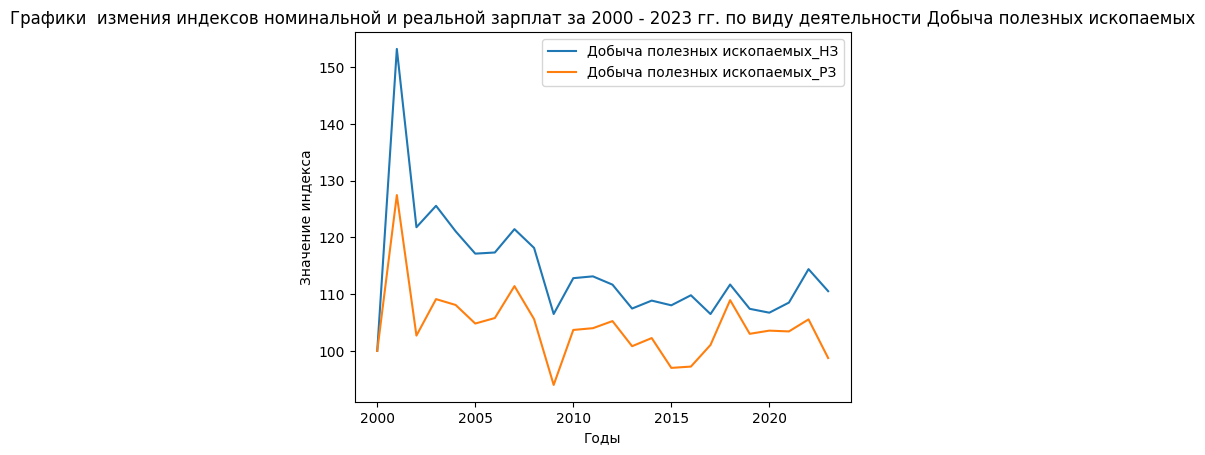

In [58]:
    austr = data_Ins.loc[data['Economics_section'].eq('добыча полезных ископаемых')]   # выбираем нужную строку данных
    austr_2 = data_Irs.loc[data['Economics_section'].eq('добыча полезных ископаемых')]   # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    plt.legend(['Добыча полезных ископаемых_НЗ', 'Добыча полезных ископаемых_РЗ'])
    plt.title('Графики  измения индексов номинальной и реальной зарплат за 2000 - 2023 гг. по виду деятельности Добыча полезных ископаемых')
    plt.ylabel('Значение индекса')
    plt.xlabel('Годы')
    plt.show()

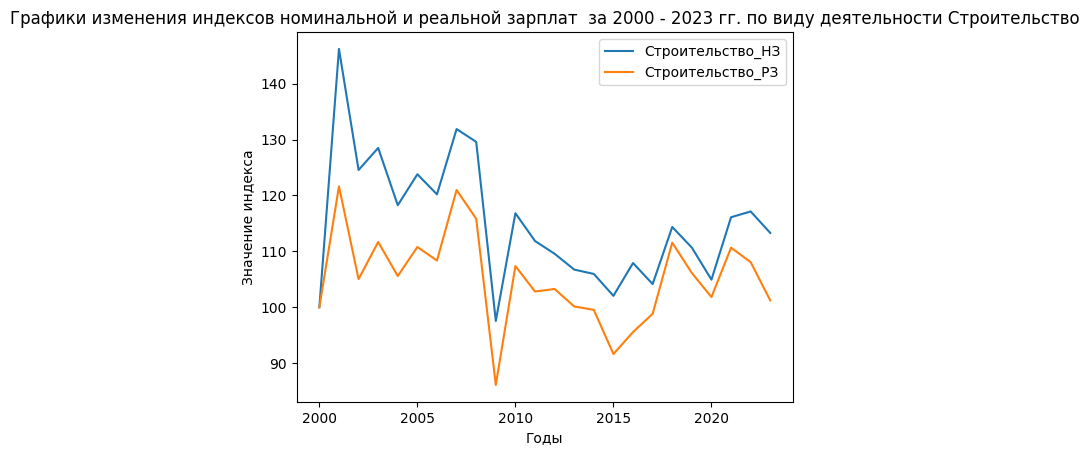

In [59]:
    austr = data_Ins.loc[data['Economics_section'].eq('строительство')]   # выбираем нужную строку данных
    austr_2 = data_Irs.loc[data['Economics_section'].eq('строительство')]   # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    plt.legend(['Cтроительство_НЗ', 'Cтроительство_РЗ'])
    plt.title('Графики изменения индексов номинальной и реальной зарплат  за 2000 - 2023 гг. по виду деятельности Cтроительство')
    plt.ylabel('Значение индекса')
    plt.xlabel('Годы')
    plt.show()

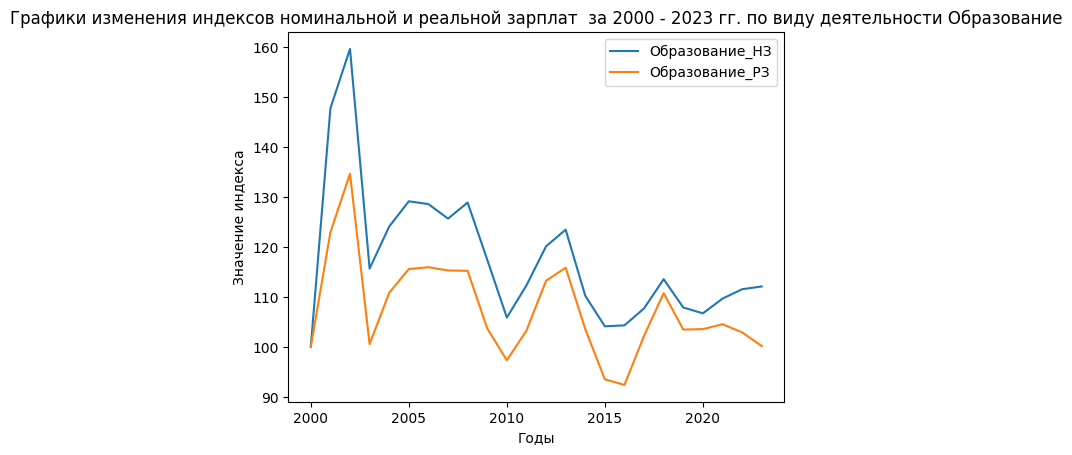

In [60]:
    austr = data_Ins.loc[data['Economics_section'].eq('образование')]   # выбираем нужную строку данных
    austr_2 = data_Irs.loc[data['Economics_section'].eq('образование')]   # выбираем нужную строку данных
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    plt.legend(['Образование_НЗ', 'Образование_РЗ'])
    plt.title('Графики изменения индексов номинальной и реальной зарплат  за 2000 - 2023 гг. по виду деятельности Образование')
    plt.ylabel('Значение индекса')
    plt.xlabel('Годы')
    plt.show()

### Вывод:
Графики измения индексов номинальной и реальной заработной платы являются одними из самых качественных показателей роста или падения заработной платы. В частности, поь графику можно отследить, насколько реально уменьшается или увеличивается реальная заработная плата при увеличении или уменьшении номинальной зарплаты.
Кроме того:
- во всех трех областях можно заметить быстрый рост зарплат , как номинальных, так и реальных, примерно с 2000 по 2003 год, однако затем резкое замедление роста зарплат примерно в 2004 г.
- такие резкие падания можно наблюдать в 2009-2010 и 2015 гг, а также быстрое падение реальных зарплат, начиная с 2022 г., особенно в Образовании и Добыче полезных ископаемых;
- можно отметить более стабильное поведение зарплат в области Добычи полезных ископаемых, но постоянные скачики зарплат в Строительстве и Образовании, что вызвано, похоже, ситуативными вбрасываниями денежных  масс с последующим урезанием.

# Дополнительные исследования

## Исследование средней заработной платы мужчин и женщин по обследованным видам экономической деятельности
Данные были взяты с сайта Росстата, информация о средней зароботной плате мужчин и женщин
https://rosstat.gov.ru/labour_costs

(по результатам выборочных обследований организаций за октябрь).

Имеется две таблицы по периодам 2005-2015 и 2017-2021 гг.
Скачаем два датасета:

In [61]:
df_MF_2005_2015 = pd.read_excel('Salary_2005_2015_MF.xlsx')

In [62]:
df_MF_2017_2021 = pd.read_excel('Salary_2017_2021_MF.xlsx')

Посмотрим на эти датафреймы:

In [63]:
df_MF_2005_2015.tail(20)

,Unnamed: 0,2005,2007,2009,2011,2013,2015
24,Транспорт и связь,NaN,NaN,NaN,NaN,NaN,NaN
25,Мужчины,13917,20106,27089,34703,37719.0,41386.0
26,Женщины,9809,14073,19011,25003,28349.0,31195.0
27,"Операции с недвижимым имуществом, аренда и пре...",NaN,NaN,NaN,NaN,NaN,NaN
28,Мужчины,12585,20230,31518,37016,42147.0,48646.0
29,Женщины,9681,16001,25666,29005,33870.0,38967.0
30,научные исследования и разработки,NaN,NaN,NaN,NaN,NaN,NaN
31,Мужчины,13833,23263,33137,41054,50940.0,59672.0
32,Женщины,9588,16196,24223,29051,37601.0,45923.0
33,Образование,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_MF_2017_2021.tail(30)

,Unnamed: 0,2017,2019,2021
21,Торговля оптовая и розничная; ремонт автотранс...,NaN,NaN,NaN
22,Мужчины,49029.0,52122.0,78612.0
23,Женщины,36862.0,41160.0,61253.0
24,Транспортировка и хранение,NaN,NaN,NaN
25,Мужчины,48878.0,55943.0,64467.0
26,Женщины,35220.0,41431.0,49300.0
27,Деятельность гостинец и предприятий общественн...,NaN,NaN,NaN
28,Мужчины,38214.0,44262.0,62506.0
29,Женщины,30832.0,34666.0,43908.0
30,Деятельность в области информации и связи,NaN,NaN,NaN


Переименум первые признаки в каждом датафрейме:

In [65]:
df_MF_2005_2015 = df_MF_2005_2015.rename(columns = {'Unnamed: 0':'section'})
df_MF_2017_2021 = df_MF_2017_2021.rename(columns = {'Unnamed: 0':'section2'})

Можно заметить, что в строках, которые содержат названия разделов экономики, нет никаких данных (сплошные NaN). Придется выбрать какую-то стратегию вырезания тех записей, которые нужны по выбранным разделам экономики:

### Исследование средних зарплат мужчин и женщин в разделе Добыча полезных ископаемых
Заметим, что __Добыча полезных ископаемых__ в строке 6. Выделим строки 7 и 8, в которых информация по зарплатам М и Ж за 2005-2015 и 2017-2021 соответственно:

In [66]:
 df_MF_2005_2015_DPI = df_MF_2005_2015.loc[7:8]
 df_MF_2005_2015_DPI

,section,2005,2007,2009,2011,2013,2015
7,Мужчины,20381,28749,35923,44723,51054.0,61216.0
8,Женщины,14312,21809,27583,33375,38889.0,45123.0


In [67]:
df_MF_2017_2021_DPI = df_MF_2017_2021.loc[7:8]
df_MF_2017_2021_DPI

,section2,2017,2019,2021
7,Мужчины,72065.0,80663.0,96768.0
8,Женщины,52903.0,61246.0,75221.0


Объединим эти датафреймы и получим данные зарплат с 2005 по 2021 гг. в __Добыче полезных ископаемых__

In [68]:
MF_DPI = pd.concat([df_MF_2005_2015_DPI, df_MF_2017_2021_DPI], axis=1)
MF_DPI

,section,2005,2007,2009,2011,2013,2015,section2,2017,2019,2021
7,Мужчины,20381,28749,35923,44723,51054.0,61216.0,Мужчины,72065.0,80663.0,96768.0
8,Женщины,14312,21809,27583,33375,38889.0,45123.0,Женщины,52903.0,61246.0,75221.0


In [69]:
del MF_DPI['section2'] # Удаляем "лишний" признак

In [70]:
MF_DPI

,section,2005,2007,2009,2011,2013,2015,2017,2019,2021
7,Мужчины,20381,28749,35923,44723,51054.0,61216.0,72065.0,80663.0,96768.0
8,Женщины,14312,21809,27583,33375,38889.0,45123.0,52903.0,61246.0,75221.0


In [71]:
MF_DPI.to_csv('MF_DPI.csv')

Из полученного ранее датафрейма с номинальными зарплатами за 2000-2023 гг. выберем данные по отдельным годам, поскольку по мужчинам и женщинам есть данные за 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021 гг.

In [72]:
data_2005_2021 =  data[["Economics_section", 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]]
data_2005_2021

,Economics_section,2005,2007,2009,2011,2013,2015,2017,2019,2021
0,добыча полезных ископаемых,19726.9,28107.5,35363.4,45132.0,54161.2,63695.0,74474.1,89343.7,103473.5
1,строительство,9042.8,14333.4,18122.2,23682.0,27701.4,29960.0,33677.9,42629.9,51944.2
2,образование,5429.7,8778.3,13293.6,15809.1,23457.9,26928.0,30257.6,37071.9,43390.5


In [73]:
data_2005_2021.to_csv('data_2005_2021.csv')

Построим график со средними зарплатами по разделу экономики __Добыча полезных ископаемых__ и средними зарплатами у мужчин и женщин в этом разделе

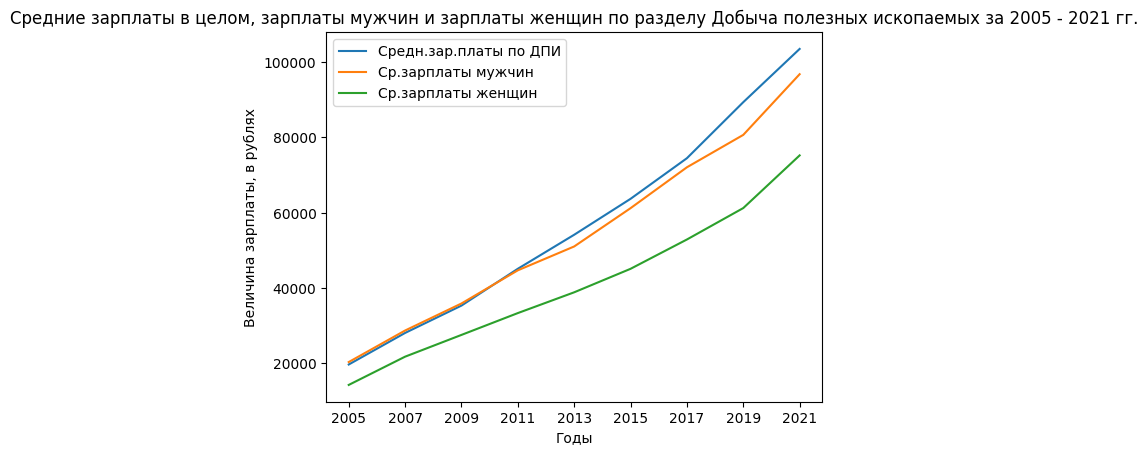

In [74]:
    austr = data_2005_2021.loc[data_2005_2021['Economics_section'].eq('добыча полезных ископаемых')]   # выбираем нужную строку данных
    austr_2 = MF_DPI.loc[MF_DPI['section'].eq('Мужчины')]
    austr_3 = MF_DPI.loc[MF_DPI['section'].eq('Женщины')]
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d_3 = austr_3.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    d_3.plot()
    plt.legend(['Средн.зар.платы по ДПИ', 'Ср.зарплаты мужчин', 'Ср.зарплаты женщин'])
    plt.title('Средние зарплаты в целом, зарплаты мужчин и зарплаты женщин по разделу Добыча полезных ископаемых за 2005 - 2021 гг.')
    plt.ylabel('Величина зарплаты, в рублях')
    plt.xlabel('Годы')
    plt.show()

### Вывод:
Анализ графиков показывает, что зарплаты женщин в разделе __Добыча полезных ископаемых__ существенно ниже зарплат мужчин, а зарплаты мужчин близки к средним зарплатам. Спорным, правда, является тот факт, что средняя номинальная зарплата выше двух других, но это можно объяснить методологией нахождения средних зарплат мужчин и женщин - это выборочные зарплаты только за один осенний месяц, а номинальная зарплата берется за весь год

### Исследование средних зарплат мужчин и женщин в разделе Строительство
Заметим, что в скачанных датасетах по средним зарплатам мужчин и женщин данные по разделу __Строительство __ находятся в строках 16-17 и 19-20 за 2005-2015 и 2017-2021 соответственно. Вытащим эти строки и, далее, создадим новым датафрейм по этим данным только для Строительства

In [75]:
df_MF_2005_2015_Str = df_MF_2005_2015.loc[16:17]
df_MF_2005_2015_Str.index = [0,1]
df_MF_2005_2015_Str

,section,2005,2007,2009,2011,2013,2015
0,Мужчины,12913,20314,24490,31243,37680.0,42157.0
1,Женщины,9941,16085,21127,26804,31844.0,38008.0


In [76]:
df_MF_2017_2021_Str = df_MF_2017_2021.loc[19:20]
df_MF_2017_2021_Str.index = [0,1]
df_MF_2017_2021_Str

,section2,2017,2019,2021
0,Мужчины,49387.0,61263.0,80270.0
1,Женщины,47242.0,53296.0,73489.0


In [77]:
MF_Str = pd.concat([df_MF_2005_2015_Str, df_MF_2017_2021_Str], axis=1)
MF_Str

,section,2005,2007,2009,2011,2013,2015,section2,2017,2019,2021
0,Мужчины,12913,20314,24490,31243,37680.0,42157.0,Мужчины,49387.0,61263.0,80270.0
1,Женщины,9941,16085,21127,26804,31844.0,38008.0,Женщины,47242.0,53296.0,73489.0


In [78]:
del MF_Str['section2']

Имеем датафрейм, который будет использован для построения графиков по разделу Строительство

In [79]:
MF_Str

,section,2005,2007,2009,2011,2013,2015,2017,2019,2021
0,Мужчины,12913,20314,24490,31243,37680.0,42157.0,49387.0,61263.0,80270.0
1,Женщины,9941,16085,21127,26804,31844.0,38008.0,47242.0,53296.0,73489.0


In [80]:
MF_Str.to_csv('MF_Str.csv')

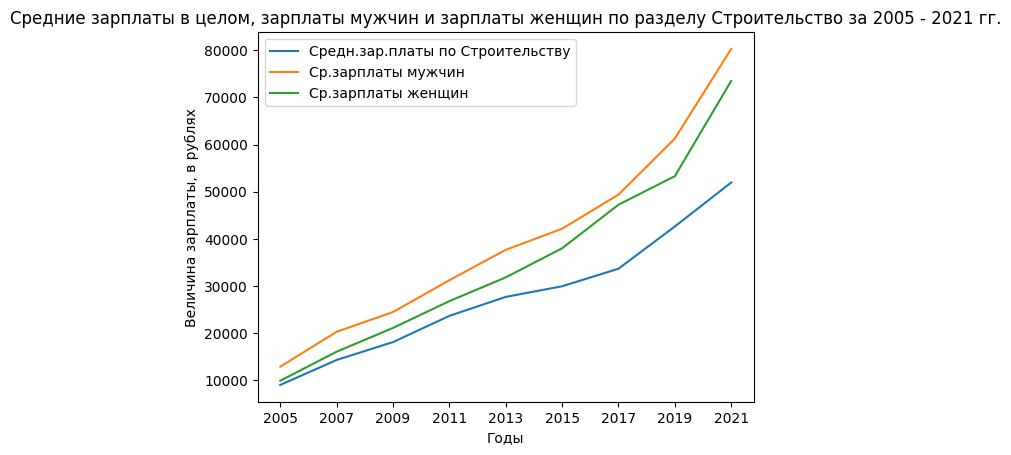

In [81]:
    austr = data_2005_2021.loc[data_2005_2021['Economics_section'].eq('строительство')]   # выбираем нужную строку данных
    austr_2 = MF_Str.loc[MF_Str['section'].eq('Мужчины')]
    austr_3 = MF_Str.loc[MF_Str['section'].eq('Женщины')]
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d_3 = austr_3.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    d_3.plot()
    plt.legend(['Средн.зар.платы по Строительству', 'Ср.зарплаты мужчин', 'Ср.зарплаты женщин'])
    plt.title('Средние зарплаты в целом, зарплаты мужчин и зарплаты женщин по разделу Строительство за 2005 - 2021 гг.')
    plt.ylabel('Величина зарплаты, в рублях')
    plt.xlabel('Годы')
    plt.show()

### Вывод:
Анализ графика зарплат мужчин и женщин в разделе экономики __Строительство__ показывает, что уровень зарплат женщин ниже, чем у мужчин, однако , в целом, отклонение между ними примерно сохраняется в течение 17 лет, с небольшим всплеском в зарплатах женщин в 2017 г., когда они почти приблизились к зарплатам мужчин.
Однако, сравнивая эти два графика с графиком номинальных зарплат, нужно сказать, что с 2013 г. номинальные зарплаты существенно отклоняются от сердних зарплат мужчин и женщин. Думаю, что это может быть связано с тем, номинальные зарплаты представлены за год в целом, а средние вязты только за один месяц, октябрь, в который, скорее всего, происходят максимальные выплаты за теплый период, и последующим "застоем" в течении холодного периода года, когда зарплаты минимальные.    
Почему это может быть связано именно с 2013 годом? Предлолагаю, что до 2012-2013 гг. не было большого строительного бума, и уровень заплат распределялся более менее равномерно в течении года, конечно, с увеличением в теплое время года. Но строительный бума полсдение 10 лет , похоже, вызвал желание максимально обогатиться, пока есть возможность , и дал работникам возможность максимально заработать в летнее время.

### Исследование средних зарплат мужчин и женщин в разделе Образование
Заметим, что в скачанных датасетах по средним зарплатам мужчин и женщин данные раздела __Образование__ находятся в строках 34-35 и 43-44 за 2005-2015 и 2017-2021 соответственно. Вытащим эти строки и, далее, создадим новым датафрейм по этим данным только для __Образования__

In [82]:
df_MF_2005_2015_Ed = df_MF_2005_2015.loc[34:35]
df_MF_2005_2015_Ed.index = [0,1]
df_MF_2005_2015_Ed

,section,2005,2007,2009,2011,2013,2015
0,Мужчины,6221,9844,13958,16932,22260.0,25860.0
1,Женщины,5420,8793,12039,15062,22031.0,24290.0


In [83]:
df_MF_2017_2021_Ed = df_MF_2017_2021.loc[43:44]
df_MF_2017_2021_Ed.index = [0,1]
df_MF_2017_2021_Ed

,section2,2017,2019,2021
0,Мужчины,29451.0,32949.0,40589.0
1,Женщины,27399.0,31355.0,39815.0


In [84]:
MF_Ed = pd.concat([df_MF_2005_2015_Ed, df_MF_2017_2021_Ed], axis=1)
MF_Ed

,section,2005,2007,2009,2011,2013,2015,section2,2017,2019,2021
0,Мужчины,6221,9844,13958,16932,22260.0,25860.0,Мужчины,29451.0,32949.0,40589.0
1,Женщины,5420,8793,12039,15062,22031.0,24290.0,Женщины,27399.0,31355.0,39815.0


In [85]:
del MF_Ed['section2']

Получим датафрейм, который будет использован для построения графиков по средним зарплатам раздела __Образование__

In [86]:
MF_Ed

,section,2005,2007,2009,2011,2013,2015,2017,2019,2021
0,Мужчины,6221,9844,13958,16932,22260.0,25860.0,29451.0,32949.0,40589.0
1,Женщины,5420,8793,12039,15062,22031.0,24290.0,27399.0,31355.0,39815.0


In [87]:
MF_Ed.to_csv('MF_Ed.csv')

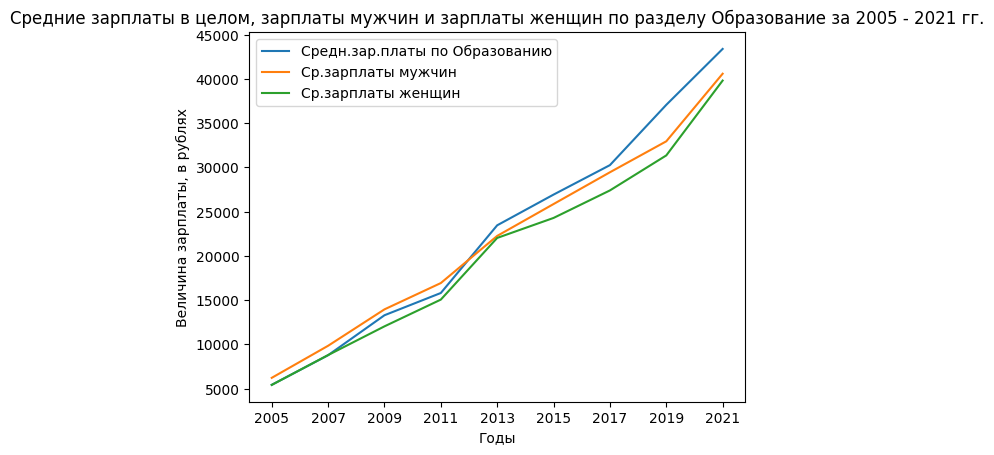

In [88]:
    austr = data_2005_2021.loc[data_2005_2021['Economics_section'].eq('образование')]   # выбираем нужную строку данных
    austr_2 = MF_Ed.loc[MF_Ed['section'].eq('Мужчины')]
    austr_3 = MF_Ed.loc[MF_Ed['section'].eq('Женщины')]
    d = austr.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]         # преобразовываем данные из широкого формата в высокий (транспонирование)
    d_2 = austr_2.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d_3 = austr_3.filter(regex=r"(?:20)\d\d").T.iloc[:, 0]
    d.plot()
    d_2.plot()
    d_3.plot()
    plt.legend(['Средн.зар.платы по Образованию', 'Ср.зарплаты мужчин', 'Ср.зарплаты женщин'])
    plt.title('Средние зарплаты в целом, зарплаты мужчин и зарплаты женщин по разделу Образование за 2005 - 2021 гг.')
    plt.ylabel('Величина зарплаты, в рублях')
    plt.xlabel('Годы')
    plt.show()

### Вывод:
Анализ графиков для раздела __Образование__ показывает, что , в целом, номинальные зарплаты и зарплаты мужчин и женщин отличаются незначительно. с 2005 по 2012 гг. средние зарплаты мужчин даже превосходили средние номинальные зарплаты по разделу.
Зарплаты женщин меньше, чем зарплаты мужчин, за исключением 2013 г., когда они совпали.
С 2017 г.  уровень средних номинальных зарплат стал превосходить средние зарплаты мужчин и женщин в этот период, что, отчасти, также может быть вызвано использованием только одного месяца в качестве усредненных данных.

## Общий вывод по исследованию:
В данном проекте было исследованы несколько таблиц данных, связанных с номинальными и реальными зарплатами с 200 по 2023 гг., и средними зарплатами мужчин и женщин с 2005 по 2021 гг. в разделах экономической деятельности __Добыча полезных ископаемых__, __Строительство__, __Образование__.
Можео сделать следующие  выводы:
1. Реальные зарплаты меньше, чем номинальные и существенно зависят от уровня годовой инфляции:
2. Зарплаты за период исследования в __Добыче полезных ископаемых__ больше, чем в __Строительстве__, и существенно больше, чем в __Образовании__.
3. Согласно индексам  номинальных и реальных зарплат, начисление происходит скачкообразно, однако за последние 10 лет наметилась устойчивая тенденции уменьшения индексации зарплат, что ведет к понижению финансовых возможностей работников.
4. Средняя заработная плата у мужчин в исследованных разделах экономики больше, чем у женщин. Особенно это заметно в __Добыче полезных ископаемых__, где зарплаты мужчин в 1,-1,5 раз выше , чем у женщин. В __Образовании__ зарплаты мужчин не слишком превышают зарплаты женщин.

## Рекомендации по итогам исследования:
По итогам исследования выбранных разделов экономической деятельности __Добыча полезных ископаемых__, __Строительство__, __Образование__ можно дать следующие рекомендации:
1. Зарплаты работников __Образования__ необходимо увеличивать, если государство хочет иметь высококвалифицированных специалистов:
2. Необходимо создавать благоприятные условия труда для женщин и учитывать их пожелания по организации трудового дня, чтобы женщины имели возможность больше зарабатывать, с учетом того, что постоянно увеличивается количнство семей с одним родителем - мамой - в качестве основного работника;
3. Минэкономразвития нужно предпринимать максимальные усилия по сдерживанию инфляции и организации постоянного индексирования номинальной заработной платы с учетом уровня инфляции для поддержания уровня заработных плат, обеспечивающего работникам достойную жизнь.